****    1. TYPES OF SUPERVISED MACHINE LEARNING\
       1. REGRESSION(deals with numeric data)\
          1. linear regression\
          2. polynomial regression\
          3. SVR\
       2. CLASSIFICATIONS(deals with categorical data)\
          1. logistic regression\
          2. decision tree \
          3. random forest\
          4. SVM\
          5. KNN\
          6. naive byes\
        **  **

DECISION TREE CLASSICATION

In [19]:
#IMPORT SOME IMPORTANT LIRARIES
import pandas as pd 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [20]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
X=df[['pclass','age','fare','sex','parch','sibsp']]
y=df['survived']

In [22]:
X=pd.get_dummies(X,columns=['sex'])

In [23]:
X.isnull().sum()

pclass          0
age           177
fare            0
parch           0
sibsp           0
sex_female      0
sex_male        0
dtype: int64

In [25]:
X.fillna({'age':X['age'].mean()},inplace=True)

<Axes: >

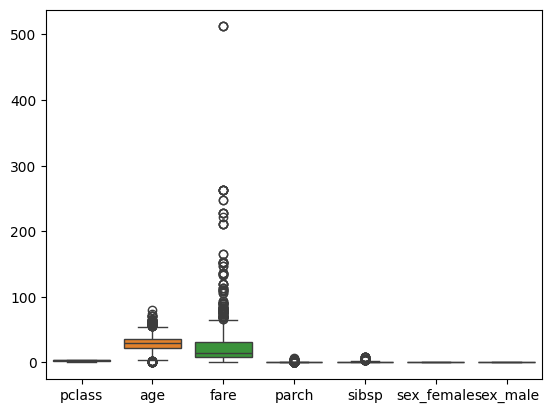

In [26]:
sns.boxplot(X)

In [27]:
#X=X[(X['age']>8)&(X['age']<45)]

In [28]:
#X=X[(X['fare']>1)&(X['fare']<30)]

<Axes: ylabel='survived'>

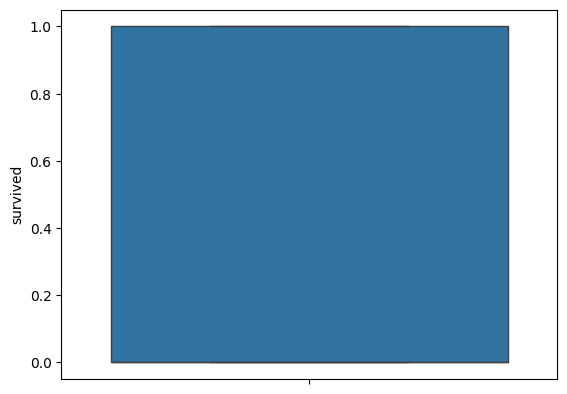

In [29]:
sns.boxplot(y)

<Axes: >

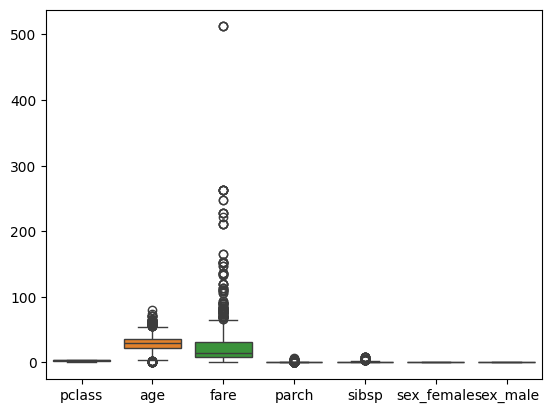

In [30]:
sns.boxplot(X)

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20)

In [32]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred=model.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred)

0.7653631284916201

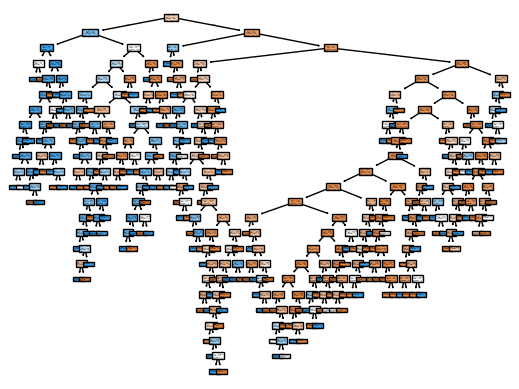

<Figure size 640x480 with 0 Axes>

In [35]:
tree.plot_tree(model.fit(X,y),filled=True)
plt.show()
plt.savefig("tree.png")

In [36]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [37]:
precision_score(y_test,y_pred)

0.65625

In [38]:
recall_score(y_test,y_pred)

0.6774193548387096

In [39]:
f1_score(y_test,y_pred)

0.6666666666666666

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

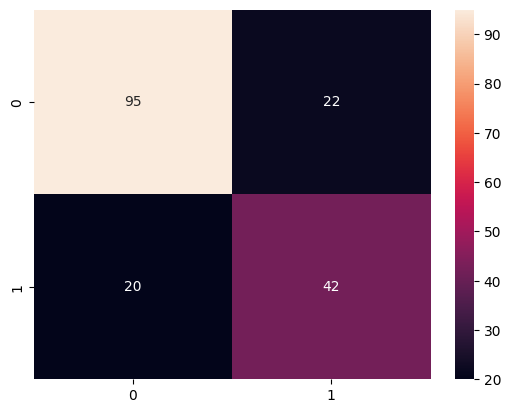

In [42]:
sns.heatmap(cm,annot=True)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix :', cm)
print('precision score is :',precision_score(y_test,y_pred))
print('recall score is :',recall_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))

confusion matrix : [[101  16]
 [ 34  28]]
precision score is : 0.6363636363636364
recall score is : 0.45161290322580644
f1 score is : 0.5283018867924528


hyperparameter tunning and grid search cv and grid search cross vallidations

<Axes: >

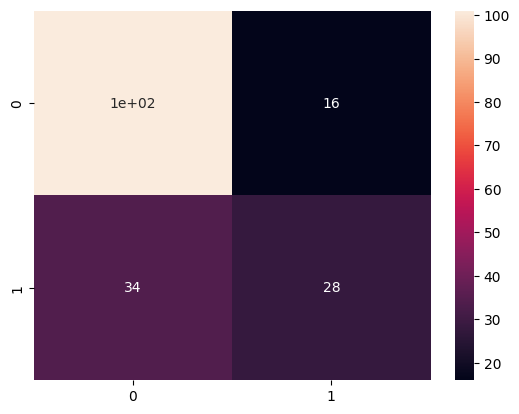

In [44]:
sns.heatmap(cm,annot=True)

**RANDOM FOREST**

In [45]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix :', cm)
print('precision score is :',precision_score(y_test,y_pred))
print('recall score is :',recall_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))

confusion matrix : [[102  15]
 [ 17  45]]
precision score is : 0.75
recall score is : 0.7258064516129032
f1 score is : 0.7377049180327869


In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix :', cm)
print('precision score is :',precision_score(y_test,y_pred))
print('recall score is :',recall_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))

confusion matrix : [[100  17]
 [ 17  45]]
precision score is : 0.7258064516129032
recall score is : 0.7258064516129032
f1 score is : 0.7258064516129032


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
#this seperate the data between two lines this line called hyperplane
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix :', cm)
print('precision score is :',precision_score(y_test,y_pred))
print('recall score is :',recall_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))

confusion matrix : [[106  11]
 [ 47  15]]
precision score is : 0.5769230769230769
recall score is : 0.24193548387096775
f1 score is : 0.3409090909090909


In [48]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix :', cm)
print('precision score is :',precision_score(y_test,y_pred))
print('recall score is :',recall_score(y_test,y_pred))
print('f1 score is :',f1_score(y_test,y_pred))

confusion matrix : [[98 19]
 [21 41]]
precision score is : 0.6833333333333333
recall score is : 0.6612903225806451
f1 score is : 0.6721311475409836


In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Sample data (replace with your actual dataset)
# X_train, y_train = ... (load your dataset here)

models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names = ['Logistic Regression', 'KNeighbors Classifier', 'RandomForest Classifier', 'SVC']
k = 10

# Ensure that you have defined X_train and y_train properly
for name, model in zip(names, models):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k)
    print(f'{name} cv accuracy is {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}')


Logistic Regression cv accuracy is 0.791 +/- 0.042
KNeighbors Classifier cv accuracy is 0.718 +/- 0.051
RandomForest Classifier cv accuracy is 0.803 +/- 0.049
SVC cv accuracy is 0.682 +/- 0.056


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # Note: corrected 'kernal' to 'kernel'
    'gamma': [0.1, 1, 10]          # Note: corrected 'gama' to 'gamma'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.79


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # Note: corrected 'kernal' to 'kernel'
    'gamma': [0.1, 1, 10]          # Note: corrected 'gama' to 'gamma'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.79
